In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt    #
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retaildataset/stores data-set.csv
/kaggle/input/retaildataset/Features data set.csv
/kaggle/input/retaildataset/sales data-set.csv
/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv


Missing Data

In [2]:
def automated_EDA(directory):
    
    #import used liberaries
    
    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    import seaborn as sns
    import matplotlib.pyplot as plt 
    import os
    
    #load data file
    try:
        data= pd.read_csv(directory)
    except Exception:
        try:
            data=pd.read_excel(directory)
        except Exception:
            print(""""THIS DATA FORMAT IS NOT SUPPORTED 
                  Please LOAD DATA ONLY IN CSV OR EXCEL FORMAT""")
    
    #DATA  SHAPE/ HEAD / DESCRIBE / INFO 
    print('Data Shape :')
    print(data.shape)
    print('\n------------------------')
 
                  
    print('Data head : ')
    display(data.head())
    print('\n------------------------')
    

    print('data info : ')
    display(data.info())
    print('\n------------------------')
    

    print('data describtion : ')
    display(data.describe())
    print('\n------------------------')

    #Missing DATA
    total_missing= data.isnull().sum()
    percent_missing=(data.isnull().sum()/data.isnull().count()) 
    
    print('\n------------------------')
    print("the missing data is as follows",total_missing)
    print('\n------------------------')
    print("percentage", percent_missing) 
    print('\n------------------------')
    #CONVERT DATE COLUMN
    try:
        if 'Date' in data.columns: #how ever we can try "Date" in many format(DATA, date etc...)
            data['Date'] = pd.to_datetime(data['Date']).astype(str)
        
    except:
        print('Date column not found')
                  
    #EXPLORE NUMERICAL COLUMNS
    numeric_data = data.select_dtypes(include=['int64', 'float64']).columns
    
    #NUMERICAL DATA IMPUTATION              
    for feature in numeric_data:
        data[feature].fillna(data[feature].mean(), inplace=True) #we can use mode, median alsodepending on data
                  
                  
    #EXPLORE CATEGORICAL COLUMNS
    categorical_data = data.select_dtypes(include=[ 'object', 'bool']).columns    
                  
    #CATEGORICAL DATA IMPUTATION
    for feature in categorical_data:
        data[feature].fillna(data[feature].mode()[0], inplace=True)
    
    
    print('\n------------------------')
    print ("MISSING DATA AFTER IMPUTATION")
    print('\n------------------------')
    print("MISSING NUMERICAL DATA COUNT", numeric_data.isnull().sum())
    print('\n------------------------')
    print("MISSING CATEGORICAL DATA COUNT", categorical_data.isnull().sum())
    print('\n------------------------')
    
    #CORRELATION MATRIX
    corr = data.corr()
    sns.heatmap(corr, annot=True)
    
    # getting distribution of numeric features with plots
    for column in numeric_data:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = data[column]
        feature.hist(bins=100, ax=ax)
        ax.axvline(feature.mean(), color='magenta',
                   linestyle='dashed', linewidth=2, label='Mean')
        ax.axvline(feature.median(), color='cyan',
                   linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(column)
        plt.legend()
        plt.show()

Data Shape :
(8190, 12)

------------------------
Data head : 


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



------------------------
data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


None


------------------------
data describtion : 


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000



------------------------

------------------------
the missing data is as follows Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

------------------------
percentage Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
dtype: float64

------------------------

------------------------
MISSING DATA AFTER IMPUTATION

------------------------
MISSING NUMERICAL DATA COUNT 0

------------------------
MISSING CATEGORICAL DATA COUNT 0

------------------------


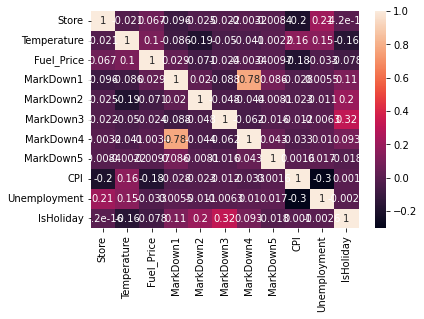

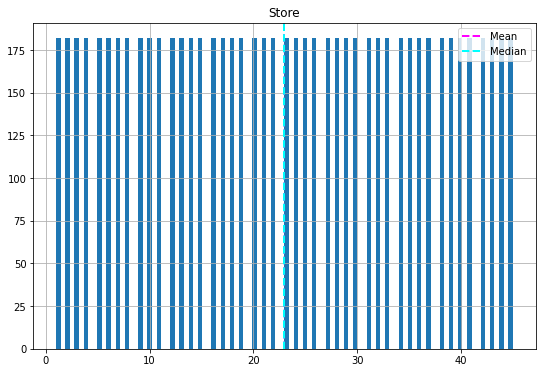

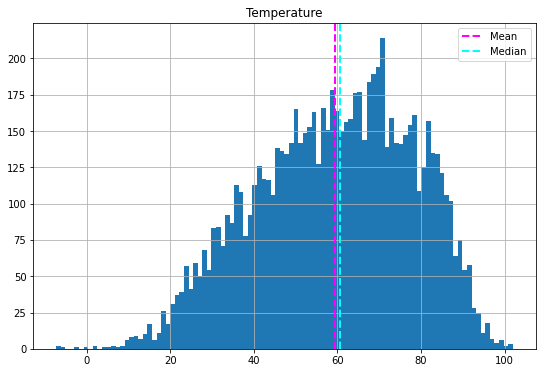

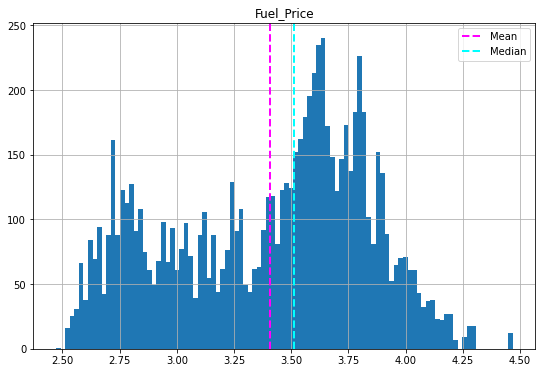

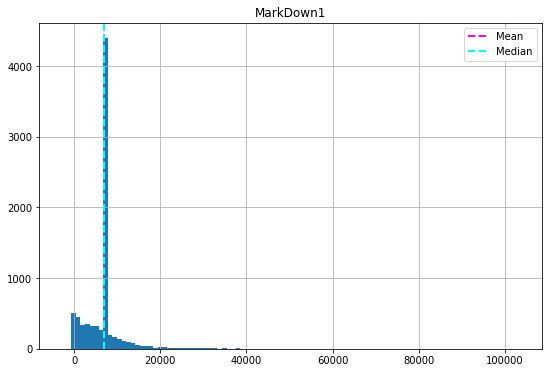

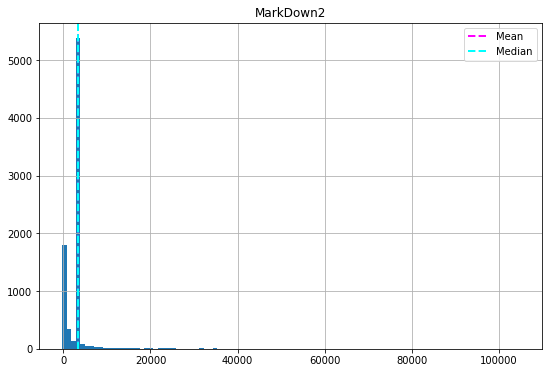

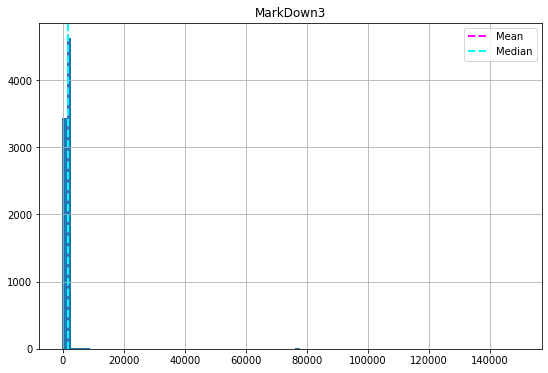

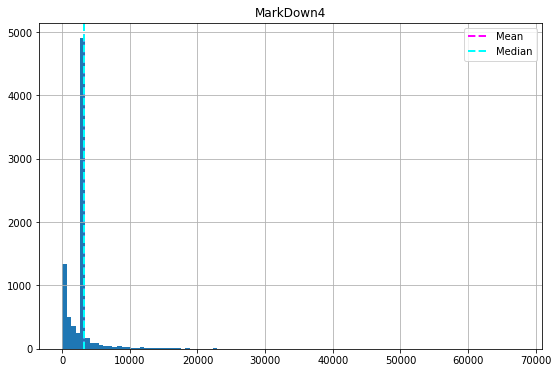

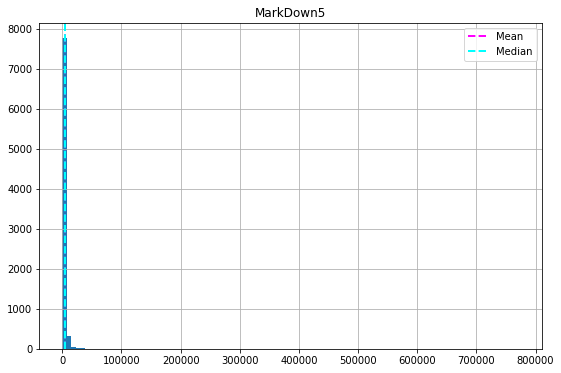

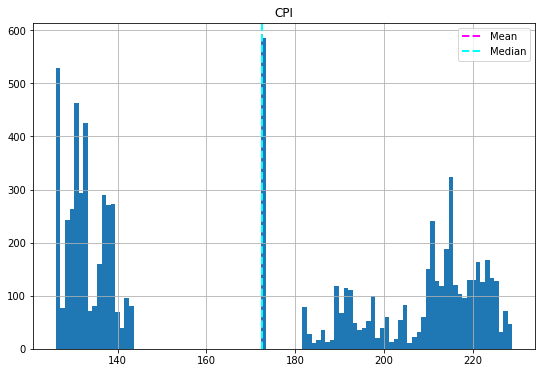

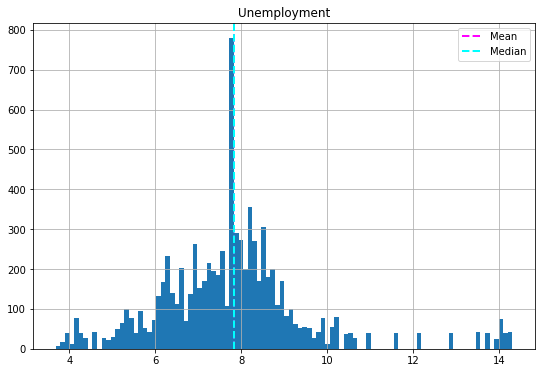

In [3]:
automated_EDA("../input/retaildataset/Features data set.csv")

Data Shape :
(5416, 14)

------------------------
Data head : 


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False



------------------------
data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null 

None


------------------------
data describtion : 


,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000



------------------------

------------------------
the missing data is as follows id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

------------------------
percentage id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      0.041913
age                        0.043390
gender                     0.000369
race                       0.096196
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
f

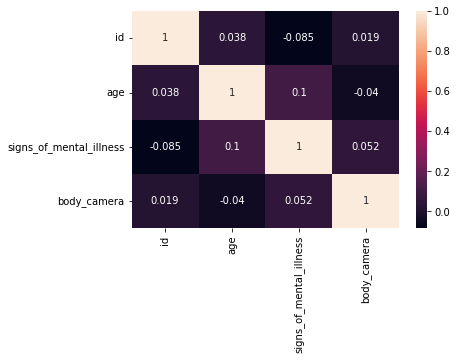

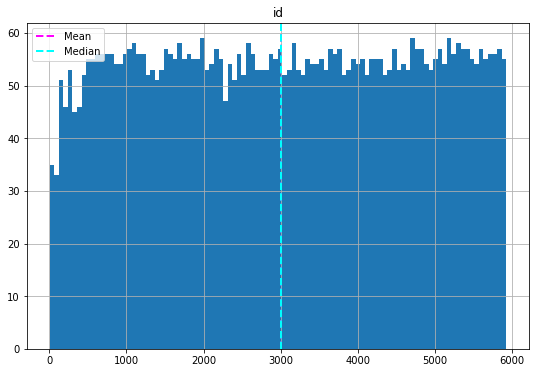

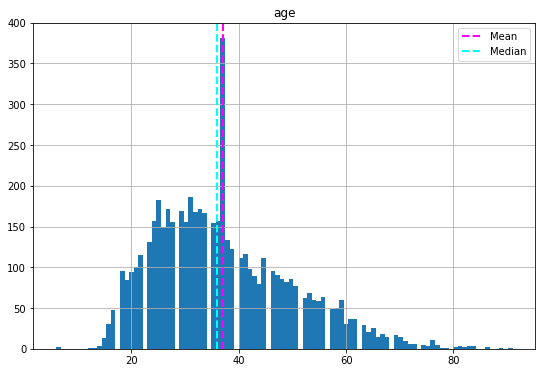

In [4]:
automated_EDA("../input/data-police-shootings/fatal-police-shootings-data.csv")

In [5]:
pp??

Object `pp` not found.


DATA CLEANING